<a href="https://colab.research.google.com/github/Daffdhot29/Clustering_bank_transactions_data/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Muhammad_Daffa_Yunus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Load data
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/dataset_clustering_project/bank_transactions_data_edited.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Tampilkan 5 baris pertama dengan function head.
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

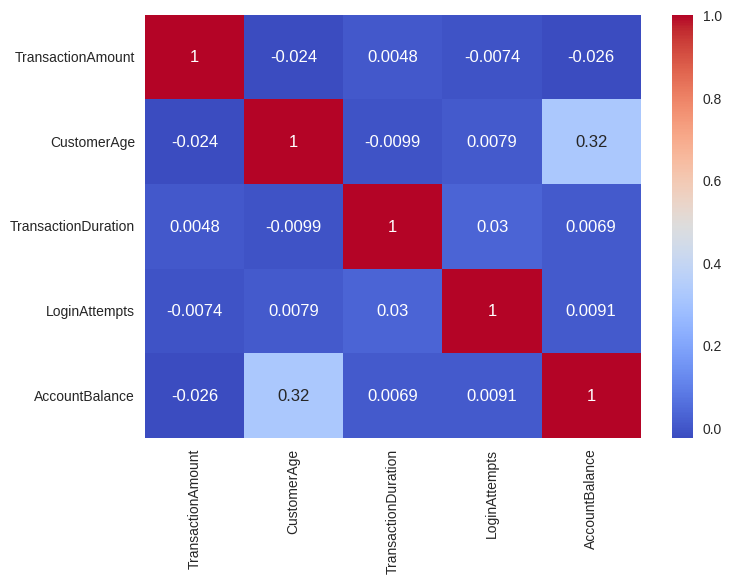

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numeric_features = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

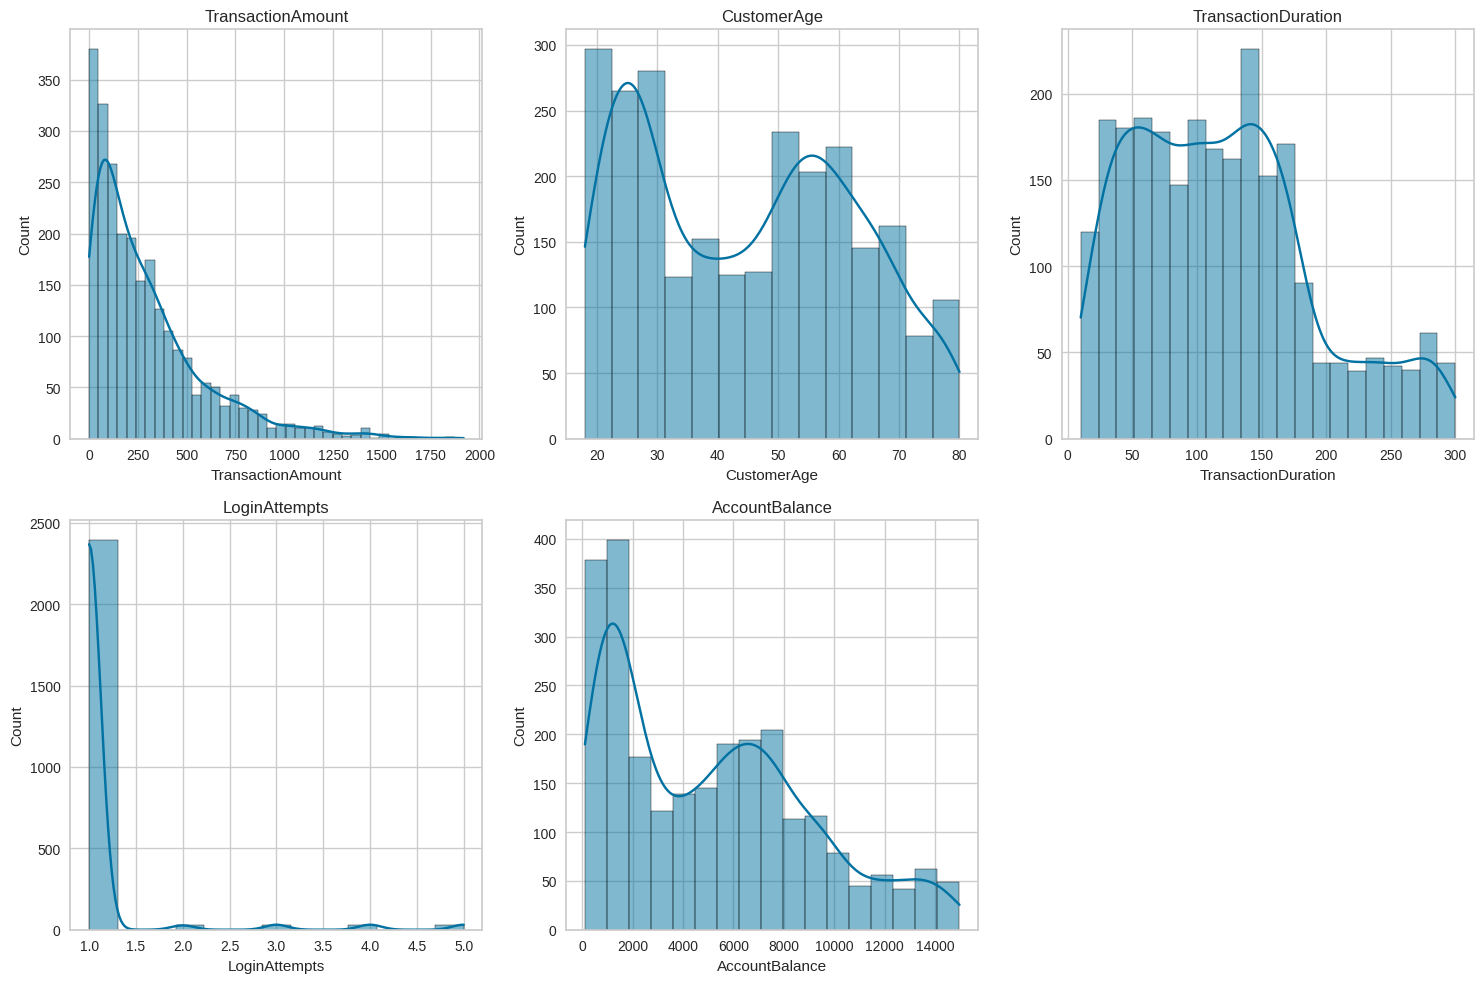

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numeric_cols = data.select_dtypes(include=['number']).columns
plt.figure(figsize=(15,10))
for i, kolom in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[kolom], kde=True)
    plt.title(kolom)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

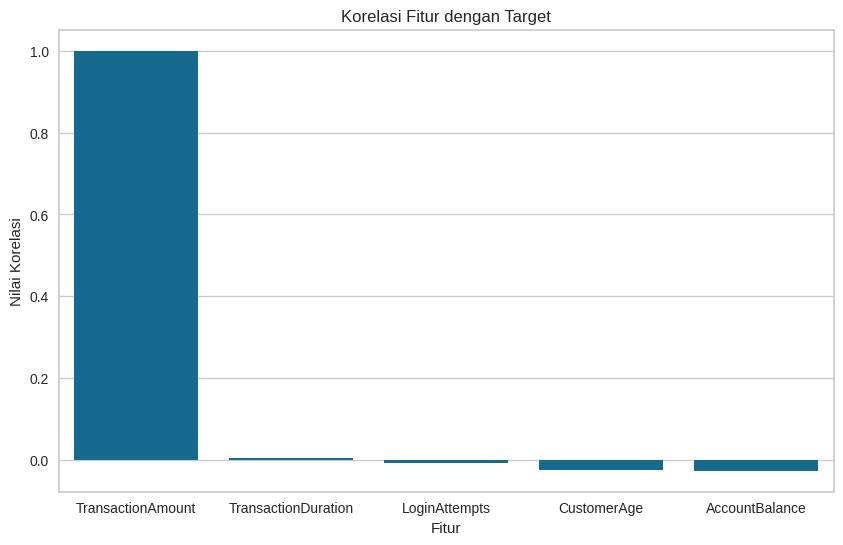

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
numeric_data = data.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID',
                          'TransactionDate', 'TransactionType', 'Location', 'Channel',
                          'CustomerOccupation', 'PreviousTransactionDate'], axis=1)
target_corr = numeric_data.corr()['TransactionAmount']

target_corr_sorted = target_corr.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=target_corr_sorted.index, y=target_corr_sorted.values)
plt.title("Korelasi Fitur dengan Target")
plt.xlabel("Fitur")
plt.ylabel("Nilai Korelasi")
plt.xticks()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
missing_value = data.isnull().sum()
missing_value[missing_value > 0]

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
duplikat = data.duplicated().sum()
print("Jumlah Data Duplikat: ", duplikat)

Jumlah Data Duplikat:  21


In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=['number']).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
data_standard = data.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'], axis=1)
data_standard.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_features = data_standard.select_dtypes(include=['object']).columns
labelencoder = LabelEncoder()
for kol in categorical_features:
  data_standard[kol] = labelencoder.fit_transform(data_standard[kol])
data_standard.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,NaN,3,1.121495,-0.204629,0.594263,16


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
data_standard.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
data_standard = data_standard.dropna()
data_standard.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
data_clean_standard = data_standard.drop_duplicates()
data_clean_standard_count = data_clean_standard.duplicated().sum()
print("Jumlah data duplikat setelah cleaning: ", data_clean_standard_count)

Jumlah data duplikat setelah cleaning:  0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
numeric_features = data_clean_standard.select_dtypes(include=['number']).columns
Q1 = data_clean_standard[numeric_features].quantile(0.25)
Q3 = data_clean_standard[numeric_features].quantile(0.75)
IQR = Q3 -Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

kondisi = ~((data_clean_standard[numeric_features] < lower_bound) | (data_clean_standard[numeric_features] > upper_bound)).any(axis=1)
data_clean_standard = data_clean_standard.loc[kondisi,numeric_features]

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

labelencoder = LabelEncoder()
data_clean_standard['TransactionAmount_encode'] = pd.cut(data_clean_standard['TransactionAmount'], bins=10, labels=False)
data_clean_standard['CustomerAge_encode'] = pd.cut(data_clean_standard['CustomerAge'], bins=10, labels=False)

data_clean_standard['TransactionAmount_encode'] = labelencoder.fit_transform(data_clean_standard['TransactionAmount_encode'])
data_clean_standard['CustomerAge_encode'] = labelencoder.fit_transform(data_clean_standard['CustomerAge_encode'])

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
data_clean_standard.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_encode,CustomerAge_encode
count,1662.000000,1662.000000,1662.0,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1.662000e+03,1662.000000,1662.000000,1662.000000,1662.00000
mean,-0.155869,1242.495187,1.0,21.375451,0.925993,-0.019284,1.531889,-0.005530,-2.046294e-01,-0.011096,182.354994,2.311071,3.77497
std,0.732855,729.956974,0.0,12.405785,0.842110,0.995828,1.154999,1.010158,3.637075e-15,0.986914,103.488718,2.344524,2.85426
min,-1.017881,0.000000,1.0,0.000000,0.000000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000,0.000000,0.00000
25%,-0.753645,614.250000,1.0,11.000000,0.000000,-0.991288,0.000000,-0.833844,-2.046294e-01,-0.936142,95.000000,0.000000,1.00000
50%,-0.355874,1235.500000,1.0,21.000000,1.000000,-0.038043,2.000000,-0.113081,-2.046294e-01,-0.102401,183.000000,2.000000,4.00000
75%,0.251850,1873.750000,1.0,32.000000,2.000000,0.803056,3.000000,0.621956,-2.046294e-01,0.643057,271.000000,4.000000,6.00000
max,2.072523,2485.000000,1.0,43.000000,3.000000,1.980594,4.000000,2.577295,-2.046294e-01,2.531190,360.000000,9.000000,9.00000


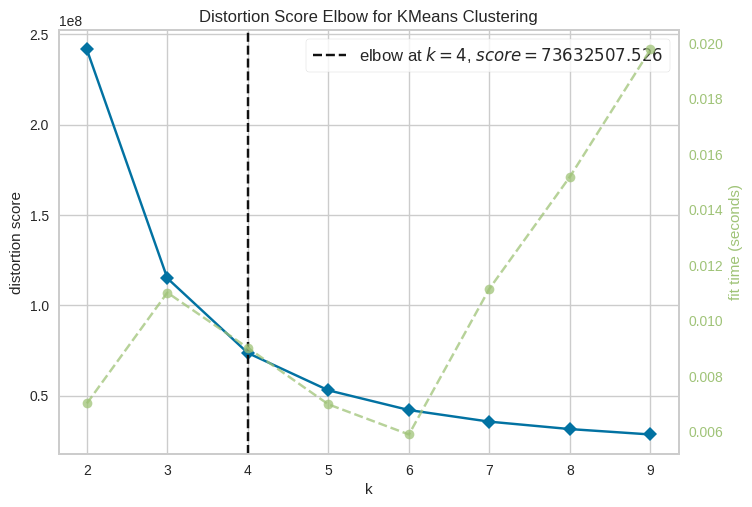

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(data_clean_standard)
visualizer.show();

In [ ]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data_for_clustering =  data_clean_standard
kmeans.fit(data_for_clustering)

labels = kmeans.labels_

k = 4
def analyze_cluster(standard_data, labels, k):
  print("Analisis Karakteristik Setiap Cluster : ")
  for clusted_id in range(k):
    # Mengambil data untuk cluster saat ini
    clusted_data = standard_data[labels == clusted_id]

    # Menghitung rata-rata untuk setiap fitur dalam cluster
    mean_transaction_amount = clusted_data['TransactionAmount'].mean()
    mean_customer_age = clusted_data['CustomerAge'].mean()

    print(f"\nCluster {clusted_id + 1}:")
    print(f"Rata-rata Transaction Amount: {mean_transaction_amount:.2f}")
    print(f"Rata-rata umur customer: {mean_customer_age:.2f}")

analyze_cluster(data_for_clustering, labels,k)

Analisis Karakteristik Setiap Cluster : 

Cluster 1:
Rata-rata Transaction Amount: -0.14
Rata-rata umur customer: -0.12

Cluster 2:
Rata-rata Transaction Amount: -0.11
Rata-rata umur customer: 0.00

Cluster 3:
Rata-rata Transaction Amount: -0.19
Rata-rata umur customer: 0.01

Cluster 4:
Rata-rata Transaction Amount: -0.18
Rata-rata umur customer: 0.03


Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_for_clustering)
labels = kmeans.labels_
score = silhouette_score(data_for_clustering, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.4981158022203467


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


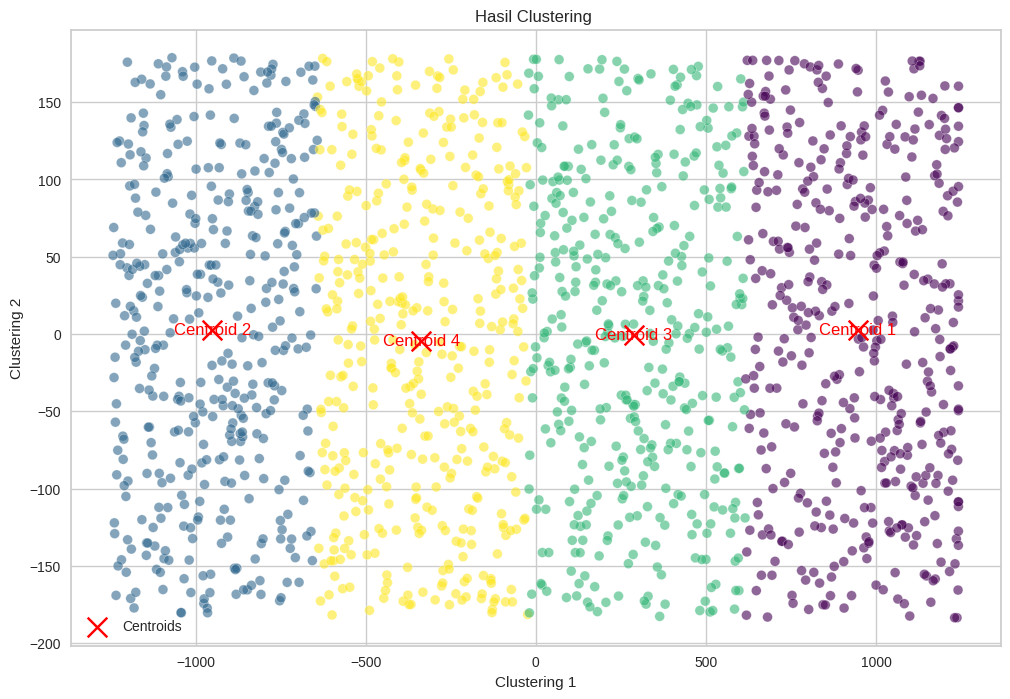

Centroids: [[ 9.46006827e+02  2.55257754e+00]
 [-9.50656275e+02  2.33786479e+00]
 [ 2.88074945e+02 -6.58225056e-01]
 [-3.36698246e+02 -4.26708475e+00]]


In [ ]:
# Membuat visualisasi hasil clustering

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_clustering)

# label
labels = kmeans.labels_
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(12,8))

# Plot data
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
# plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='x', label='Centroids')

for i, centroid in enumerate(centroids_pca):
  plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('Hasil Clustering ')
plt.xlabel('Clustering 1')
plt.ylabel('Clustering 2')
plt.legend()
plt.show()

print("Centroids:", centroids_pca)

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_clustering)
data_final_pca = pd.DataFrame(data_pca,columns = ['PCA1','PCA2'])
kmeans = KMeans(n_clusters=4)
model_pca = kmeans.fit(data_final_pca)
model_pca


KMeans(n_clusters=4)

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
import joblib
joblib.dump(model_pca, 'PCA_model_clustering.h5')

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
# Jalankan clustering

numeric_features= data_clean_standard.select_dtypes(include=['number']).columns.tolist()
data_clean_standard['Cluster'] = labels

cluster_analysis = data_clean_standard.groupby('Cluster')[numeric_features].agg(['mean', 'min', 'max'])
cluster_analysis.columns = ['{}_{}'.format(col[0],col[1]) for col in cluster_analysis.columns]
pd.options.display.max_columns = 42
cluster_analysis.head()

,TransactionAmount_mean,TransactionAmount_min,TransactionAmount_max,TransactionDate_mean,TransactionDate_min,TransactionDate_max,TransactionType_mean,TransactionType_min,TransactionType_max,Location_mean,Location_min,Location_max,Channel_mean,Channel_min,Channel_max,CustomerAge_mean,CustomerAge_min,CustomerAge_max,CustomerOccupation_mean,CustomerOccupation_min,CustomerOccupation_max,TransactionDuration_mean,TransactionDuration_min,TransactionDuration_max,LoginAttempts_mean,LoginAttempts_min,LoginAttempts_max,AccountBalance_mean,AccountBalance_min,AccountBalance_max,PreviousTransactionDate_mean,PreviousTransactionDate_min,PreviousTransactionDate_max,TransactionAmount_encode_mean,TransactionAmount_encode_min,TransactionAmount_encode_max,CustomerAge_encode_mean,CustomerAge_encode_min,CustomerAge_encode_max,Cluster_mean,Cluster_min,Cluster_max
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.174251,-1.017881,2.050618,2188.498829,1860,2485,1.0,1,1,21.831382,0,43,0.992974,0,3,0.008576,-1.495947,1.980594,1.468384,0,4,-0.007641,-1.561745,2.577295,-0.204629,-0.204629,-0.204629,0.077965,-1.286100,2.531190,185.868852,0,360,2.257611,0,9,3.840749,0,9,0.0,0,0
1,-0.134046,-1.015827,1.985656,292.596059,0,600,1.0,1,1,21.298030,0,43,0.926108,0,3,-0.126710,-1.495947,1.980594,1.502463,0,4,-0.024422,-1.561745,2.563023,-0.204629,-0.204629,-0.204629,-0.034665,-1.285856,2.522155,184.032020,1,360,2.366995,0,9,3.448276,0,9,1.0,1,1
2,-0.119277,-1.017676,2.072523,1531.319712,1221,1858,1.0,1,1,21.076923,0,43,0.875000,0,3,0.006034,-1.495947,1.980594,1.639423,0,4,0.027312,-1.547472,2.563023,-0.204629,-0.204629,-0.204629,-0.052746,-1.281807,2.481241,182.423077,0,360,2.432692,0,9,3.858173,0,9,2.0,2,2
3,-0.195173,-1.013945,2.022484,907.300242,601,1219,1.0,1,1,21.280872,0,43,0.907990,0,3,0.032015,-1.495947,1.980594,1.518160,0,4,-0.017855,-1.533199,2.548750,-0.204629,-0.204629,-0.204629,-0.038053,-1.278905,2.512436,177.004843,0,360,2.188862,0,9,3.944310,0,9,3.0,3,3


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (0)**:
  - **Rata-rata (mean) <Fitur>:**
  1. Rata-rata(TransactionAmount) = -0.174
  2. Rata-rata(CustomerAge) = 0.009
  3. Rata-rata(TransactionDuration) = -0.008
  4. Rata-rata(LoginAttempts) = -0.205
  5. Rata-rata(AccountBalance) = 0.038
  - **Analisis:**
    Cluster ini menggambarkan TransactionAmount yang kecil, CustomerAge/umur nasabah yang rata-rata, LoginAttempts yang stabil dan AccountBalance yang normal

2. **Cluster 2: (1)**:
  - **Rata-rata (mean) <Fitur>:**
  1. Rata-rata(TransactionAmount) = -0.134
  2. Rata-rata(CustomerAge) = -0.127
  3. Rata-rata(TransactionDuration) = -0.024
  4. Rata-rata(LoginAttempts) = -0.205
  5. Rata-rata(AccountBalance) = -0.035
  - **Analisis:**
    Cluster ini menggambarkan TransactionAmount/Jumlah transaksi yang rendah, dengan CustomerAge/Umur nasabah yang muda, serta TransactionDuration/Durasi yang normal dan login yang stabil dengan AccountBalance yang kecil/rendah




3. **Cluster 3: (2)**:
  - **Rata-rata (mean) <Fitur>:**
  1. Rata-rata(TransactionAmount) = -0.119
  2. Rata-rata(CustomerAge) = 0.006
  3. Rata-rata(TransactionDuration) = 0.027
  4. Rata-rata(LoginAttempts) = -0.205
  5. Rata-rata(AccountBalance) = -0.053
  - **Analisis:**
    Cluster ini menggambarkan TransactionAmount/jumlah transaksi yang rendah, dengan CustomerAge/Usia yang rata-rata, serta kecenderungan durasi Transaksi/TransactionDuration yang lebih lama dari cluster 1 dan 2, LoginAttempts yang stabil dan Jumlah Saldo/AccountBalance yang rendah



4. **Cluster 4: (3)**:
  - **Rata-rata (mean) <Fitur>:**
  1. Rata-rata(TransactionAmount) = -0.195
  2. Rata-rata(CustomerAge) = 0.032
  3. Rata-rata(TransactionDuration) = -0.018
  4. Rata-rata(LoginAttempts) = -0.205
  5. Rata-rata(AccountBalance) = -0.038
  - **Analisis:**
    Cluster ini menggambarkan jumlah transaksi/TransactionAmount yang kecil, CustomerAge/umur nasabah yang tua serta durasi/TransactionDuration yang cepat, aktivitas login/LoginAttempts yang stabil dan AccountBalance/jumlah saldo yang rendah


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
data_for_clustering = data_for_clustering.rename(columns={'Cluster':'Target'})
data_for_clustering.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_encode,CustomerAge_encode,Target
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105,0,8,3
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192,4,8,3
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41,1,0,2
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163,2,1,3
5,-0.703375,635,1,28,0,-1.495947,3,0.750409,-0.204629,-1.111505,13,1,0,3


In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
data_for_clustering.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.